In [81]:
import pathlib
import numpy as np
import cv2 as cv


path=str(pathlib.Path().resolve().parent)+"/imagenes/"

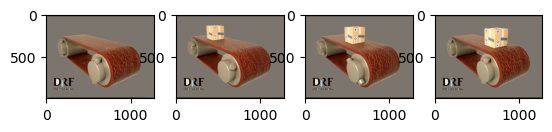

In [82]:
from matplotlib import pyplot as plt


src1 = cv.imread(path+"banda_vacia.png")
src1 = cv.cvtColor(src1,cv.COLOR_BGR2RGB)
src2 = cv.imread(path+"banda_caja1.png")
src2 = cv.cvtColor(src2,cv.COLOR_BGR2RGB)
src3 = cv.imread(path+"banda_caja1_5.png")
src3 = cv.cvtColor(src3,cv.COLOR_BGR2RGB)
src4 = cv.imread(path+"banda_caja2.png")
src4 = cv.cvtColor(src4,cv.COLOR_BGR2RGB)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)

ax1.imshow(src1)
ax2.imshow(src2)
ax3.imshow(src3)
ax4.imshow(src4)

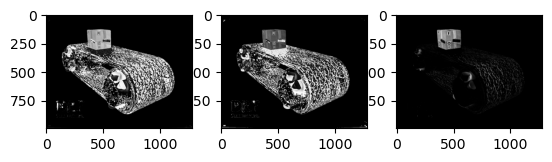

In [83]:
# RESTAR CON OPERACIONES ARIGMÉTICAS QUE SI SUBE DE 255 O BAJA DE 0 DA LA VUELTA

from typing import ChainMap


img1 = cv.cvtColor(src1,cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src2,cv.COLOR_RGB2GRAY)

fig,(ax1,ax2,ax3) = plt.subplots(1,3)

r1 = img1-img2
r2 = img2-img1

# ESTO INTENTA EVITAR QUE NOS PASEMOS PERO A LO BRUTO Y ASÍ OBTENEMOS LA CAJA SOLA
r3 = cv.subtract(img2,img1)

ax1.imshow(r1,cmap="gray")
ax2.imshow(r2,cmap="gray")
ax3.imshow(r3,cmap="gray")

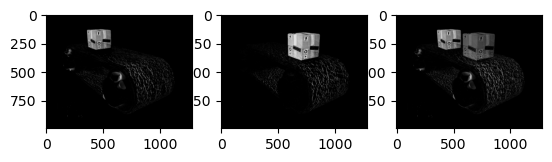

In [84]:
from typing import ChainMap


img1 = cv.cvtColor(src1,cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src2,cv.COLOR_RGB2GRAY)
img4 = cv.cvtColor(src4,cv.COLOR_RGB2GRAY)

fig,(ax1,ax2,ax3) = plt.subplots(1,3)

r1 = cv.subtract(img2,img1)
r2 = cv.subtract(img4,img1)

# ESTO SUMA LAS DOS IMAGENES PARA QUE APAREZCAN DOS CAJAS
r3 = cv.add(r1,r2)

# PESO DE UNA IMAGEN RESPECTO A OTRA
r3 = cv.addWeighted(r1, 1, r2, 0.5,gamma=0)

ax1.imshow(r1,cmap="gray")
ax2.imshow(r2,cmap="gray")
ax3.imshow(r3,cmap="gray")

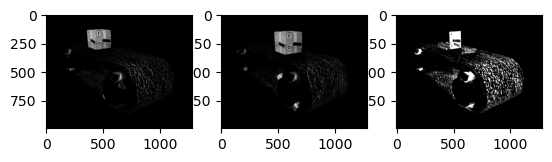

In [85]:
img1 = cv.cvtColor(src1, cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src2, cv.COLOR_RGB2GRAY)
img3 = cv.cvtColor(src3, cv.COLOR_RGB2GRAY)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

r1 = cv.subtract(img2, img1)
r2 = cv.subtract(img3, img1)

# Donde esté alguna parte oscura estará más oscuro mientras que lo claro estará más claro
r3 = cv.multiply(r1, r2)


ax1.imshow(r1, cmap="gray")
ax2.imshow(r2, cmap="gray")
ax3.imshow(r3, cmap="gray")

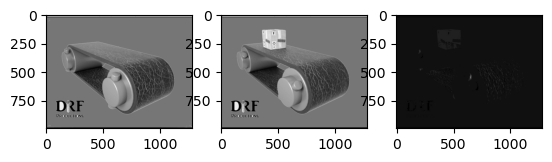

In [86]:
img1 = cv.cvtColor(src1, cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src2, cv.COLOR_RGB2GRAY)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# LOS SITIOS QUE ESTÉN OSCUROS Y SI SE DIVIDEN ENTRE OSCUROS (BYTE CERCA DEL 1 ENTRE CERCA DE 1)
# SI DIVIDIMOS AL REVÉS SE NOTA UN POCO LA CAJA
#d1 = cv.divide(img1, img2)
d1 = cv.divide(img2, img1)


ax1.imshow(img1, cmap="gray")
ax2.imshow(img2, cmap="gray")
ax3.imshow(d1, cmap="gray")

Text(0.5, 1.0, 'NOT')

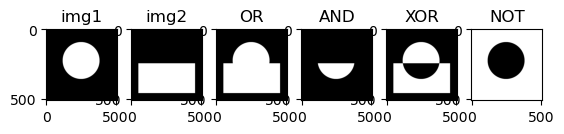

In [87]:
src1 = cv.imread(path + "test5.png"); src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)
src2 = cv.imread(path + "test6.png"); src2 = cv.cvtColor(src2, cv.COLOR_BGR2RGB)

img1 = cv.cvtColor(src1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(src2, cv.COLOR_BGR2GRAY)
img3 = cv.bitwise_or(img1, img2)
img4 = cv.bitwise_and(img1, img2)
img5 = cv.bitwise_xor(img1, img2)
img6 = cv.bitwise_not(img1)


fig , (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)

ax1.imshow(img1, cmap="gray"); ax1.set_title("img1")
ax2.imshow(img2, cmap="gray"); ax2.set_title("img2")
ax3.imshow(img3, cmap="gray"); ax3.set_title("OR")
ax4.imshow(img4, cmap="gray"); ax4.set_title("AND")
ax5.imshow(img5, cmap="gray"); ax5.set_title("XOR")
ax6.imshow(img6, cmap="gray"); ax6.set_title("NOT")
ax6.imshow(img6, cmap="gray"); ax6.set_title("NOT")


Text(0.5, 1.0, 'img4 or img5')

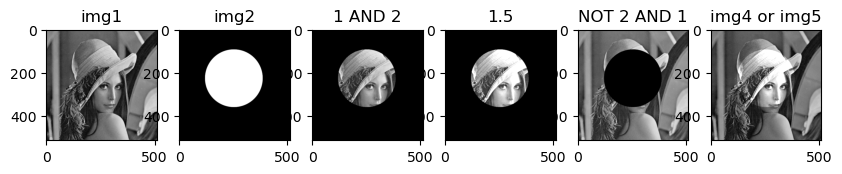

In [118]:
src1 = cv.imread(path + "test.png"); src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)
src2 = cv.imread(path + "test5.png"); src2 = cv.cvtColor(src2, cv.COLOR_BGR2RGB)

img1 = cv.cvtColor(src1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(src2, cv.COLOR_BGR2GRAY)
img3 = cv.bitwise_and(img1,img2)
img4 = cv.multiply(img3,1.5)
img5 = cv.bitwise_and(img1,cv.bitwise_not(img2))
img6 = cv.bitwise_or(img4,img5)

fig , (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6,figsize=(10,10))

ax1.imshow(img1, cmap="gray"); ax1.set_title("img1")
ax2.imshow(img2, cmap="gray"); ax2.set_title("img2")
ax3.imshow(img3,cmap="gray"); ax3.set_title("1 AND 2")
ax4.imshow(img4,cmap="gray"); ax4.set_title("1.5")
ax5.imshow(img5,cmap="gray"); ax5.set_title("NOT 2 AND 1")
ax6.imshow(img6, cmap="gray"); ax6.set_title("img4 or img5")


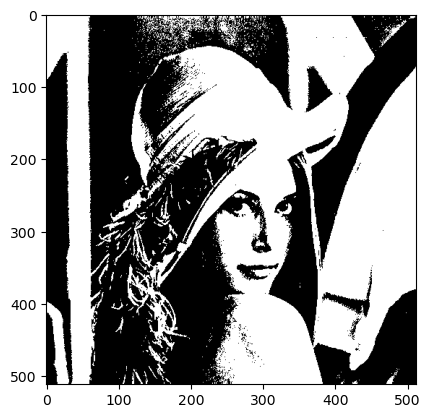

In [124]:
src1 = cv.imread(path + "test.png"); src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(src1, cv.COLOR_BGR2GRAY)
min, max, minLoc, maxLoc = cv.minMaxLoc(img1)
#umbral = (min + max)//2
#umbral = 127
media, desviacion = cv.meanStdDev(img1)
umbral = media


img1[img1 <= umbral] = 0
img1[img1 > umbral] = 


plt.imshow(img1, cmap="gray")

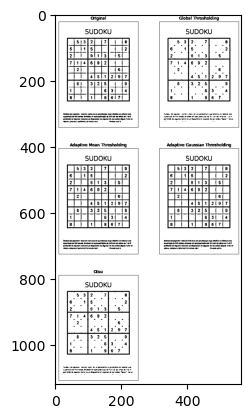

In [139]:
src1 = cv.imread(path + "sudoku.png"); src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(src1, cv.COLOR_BGR2GRAY)

# FORMA MALA
ret, th1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)

# FORMA BUENA, SUBE O BAJA EL UMBRAL DEPENDIENDO SI CAMBIARLO O NO CON LOS VECINOS
th1 = cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

plt.imshow(th1, cmap="gray")